# PARAMETRIC VaR

In [45]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats

In [46]:
end_date = dt.datetime(2019,9,1)
strt_date = end_date - dt.timedelta(days=500)

In [47]:
Portfolio_Val = 1_000_000
stocks = [ "DLF.NS" , "NTPC.NS" , "HDFCBANK.NS" ] 

In [48]:
data = yf.download(stocks,
                   start=strt_date,
                   end=end_date)
data1= data.copy(deep=True)

[*********************100%%**********************]  3 of 3 completed


C:\Users\RONIT KUMAR LENKA\anaconda3\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\RONIT KUMAR LENKA\anaconda3\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\RONIT KUMAR LENKA\anaconda3\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [49]:
Adj_close = data1["Adj Close"]
print(Adj_close.head())
returns = np.log(Adj_close/Adj_close.shift(1)).dropna()

                DLF.NS  HDFCBANK.NS     NTPC.NS
Date                                           
2018-04-19  204.154312   917.039185  106.837692
2018-04-20  199.793472   925.031982  104.912178
2018-04-23  201.025864   915.502136  104.460869
2018-04-24  204.628342   915.147339  104.009552
2018-04-25  207.472366   908.407959  103.407822


In [50]:
w = [0.4 , 0.4 , 0.2 ]
portfolio_retrn = np.sum(w*returns,axis=1)

In [51]:
mean = portfolio_retrn.mean()
sd = portfolio_retrn.std()
print("Mean and Standard Deviation of the Portfolio are" , mean , "and" , sd , "respectively.")

Mean and Standard Deviation of the Portfolio are -0.00017421816771143005 and 0.01424092612823874 respectively.


In [52]:
ci = 0.99
z = stats.norm.ppf(1-ci,loc=0,scale=1)

In [53]:
Var = mean + z * sd
print("99% Parametric VaR for the Portfolio is INR", -Var*Portfolio_Val)

99% Parametric VaR for the Portfolio is INR 33303.566390512286


# VaR ESTIMATION USING HISTORICAL SIMULATION

In [56]:
Var_Hs = np.percentile(portfolio_retrn,100-ci*100)
Var_Hs = -Var_Hs*Portfolio_Val
print("VaR using Historical Simulation is INR", Var_Hs)

VaR using Historical Simulation is INR 38719.743193575836


# PLOTTING THE VaR LEVELS USING THE 2 METHODS

Parametric VaR at 99% confidence = 33303.566390512286
Historical VaR at 99% confidence = 38719.743193575836


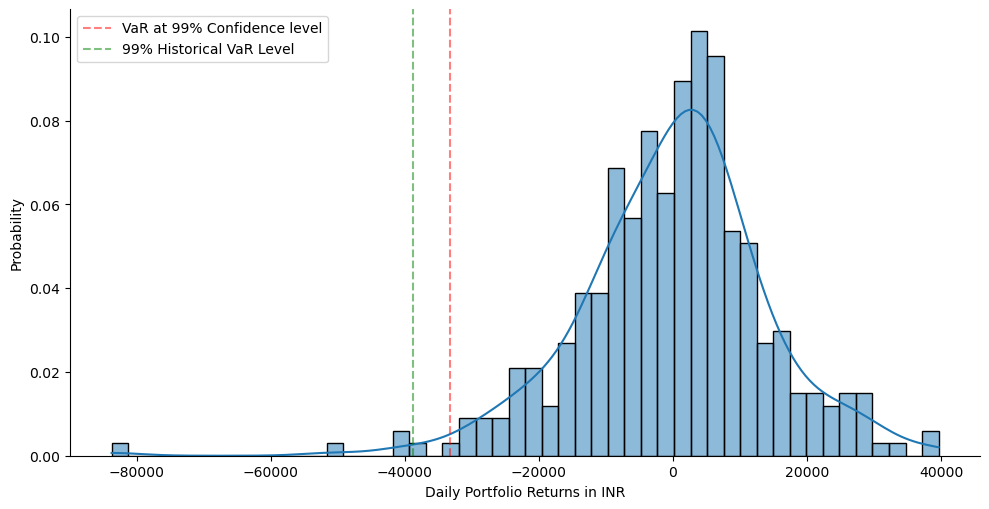

In [67]:
sns.displot(portfolio_retrn*Portfolio_Val,stat="probability",aspect=2,bins=50,kde=True)
plt.axvline(x=Var*Portfolio_Val,color='red',linestyle="--",label="VaR at 99% Confidence level",alpha=0.5)
plt.axvline(x=-Var_Hs,color='green',linestyle="--",label="99% Historical VaR Level",alpha=0.5)
plt.xlabel("Daily Portfolio Returns in INR")
plt.legend()
print("Parametric VaR at 99% confidence =" , -Var*Portfolio_Val)
print("Historical VaR at 99% confidence =" , Var_Hs)

plt.savefig("Var_plot.png")